# Title: Personalized AI based Treatment Recommender

## Preprocessing

In [ ]:
import  pandas as pd

In [ ]:
dataset = pd.read_csv('Training.csv')
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
dataset.shape

(4920, 133)

In [ ]:
# prompt: Dimensionality Reduction

import pandas as pd
from sklearn.decomposition import PCA

# Assuming 'dataset' is your DataFrame with relevant features
X = dataset.drop('prognosis', axis=1)  # Replace 'prognosis' with your target column name
y = dataset['prognosis']

# Initialize PCA with desired number of components
pca = PCA(n_components=0.95)  # Retain 95% of variance

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Create a new DataFrame with reduced dimensions
reduced_dataset = pd.DataFrame(data=X_pca)
reduced_dataset['prognosis'] = y

print("Original shape:", X.shape)
print("Reduced shape:", reduced_dataset.shape)

Original shape: (4920, 132)
Reduced shape: (4920, 37)


# Train test-split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

# Training top models

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")


SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


KNeighbors Accuracy: 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ..

# Data Visualization

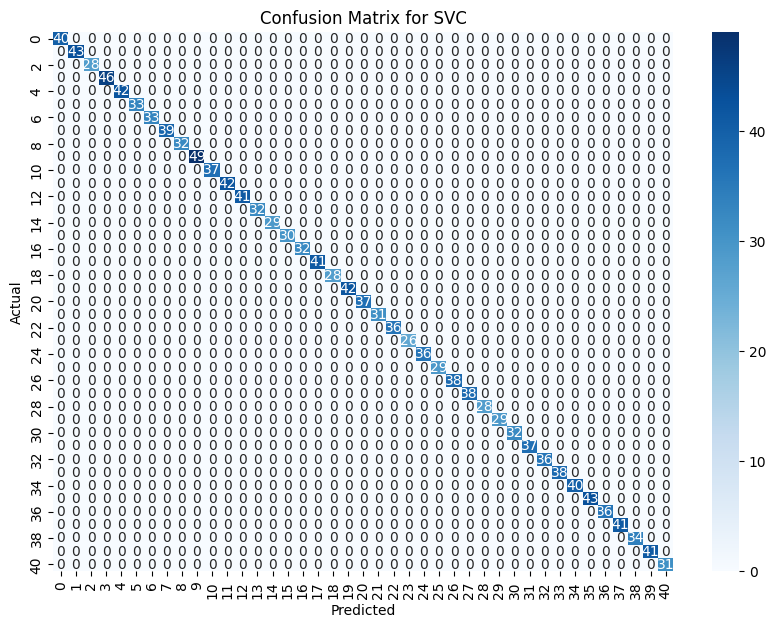

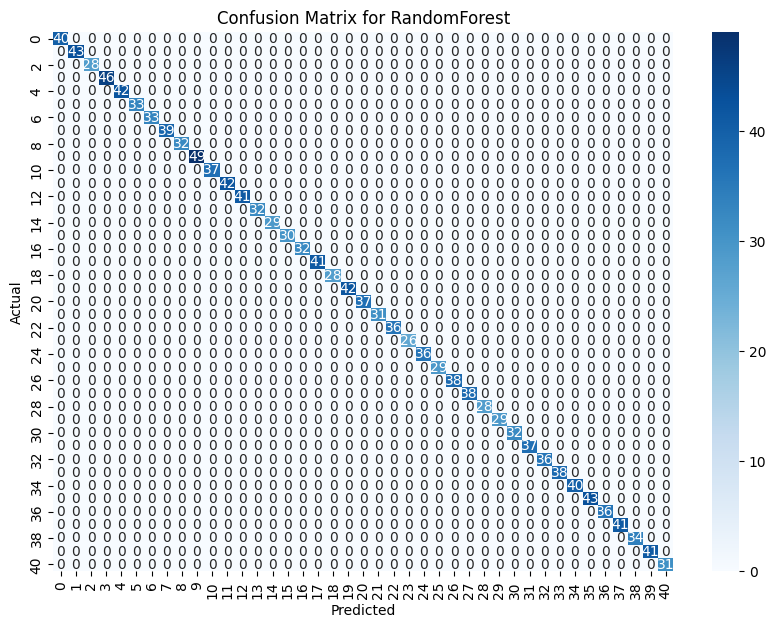

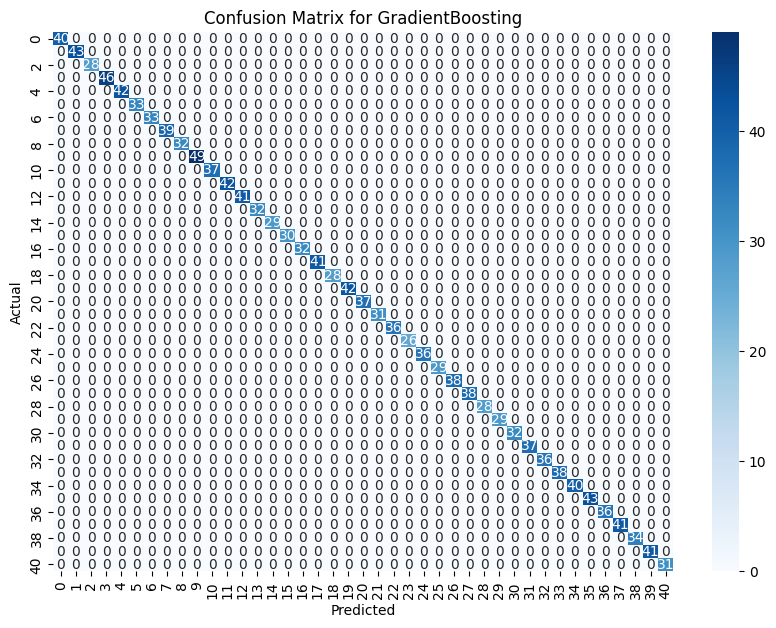

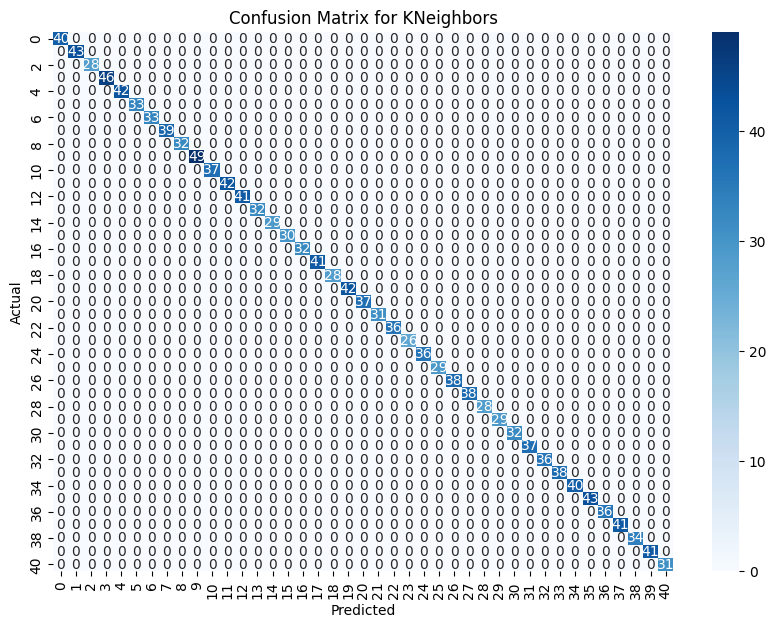

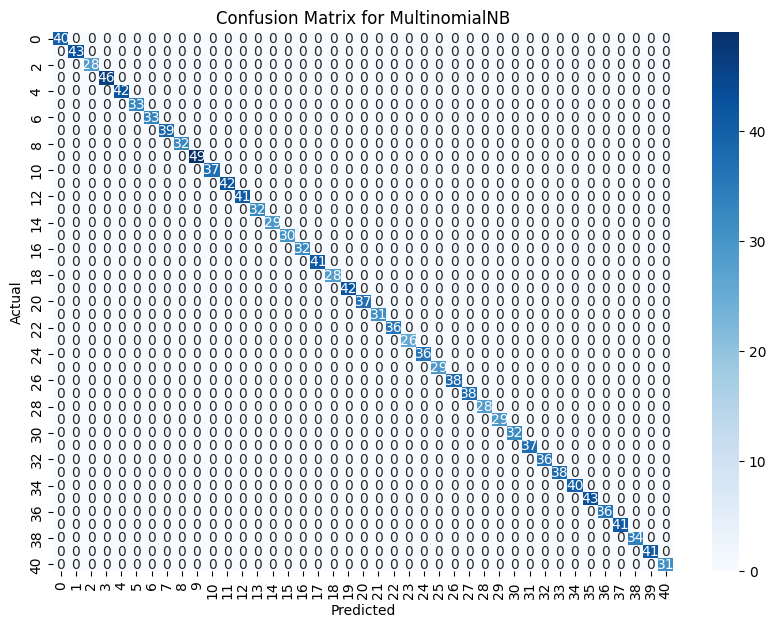

In [ ]:
# Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

def plot_confusion_matrix(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for model_name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, model_name)


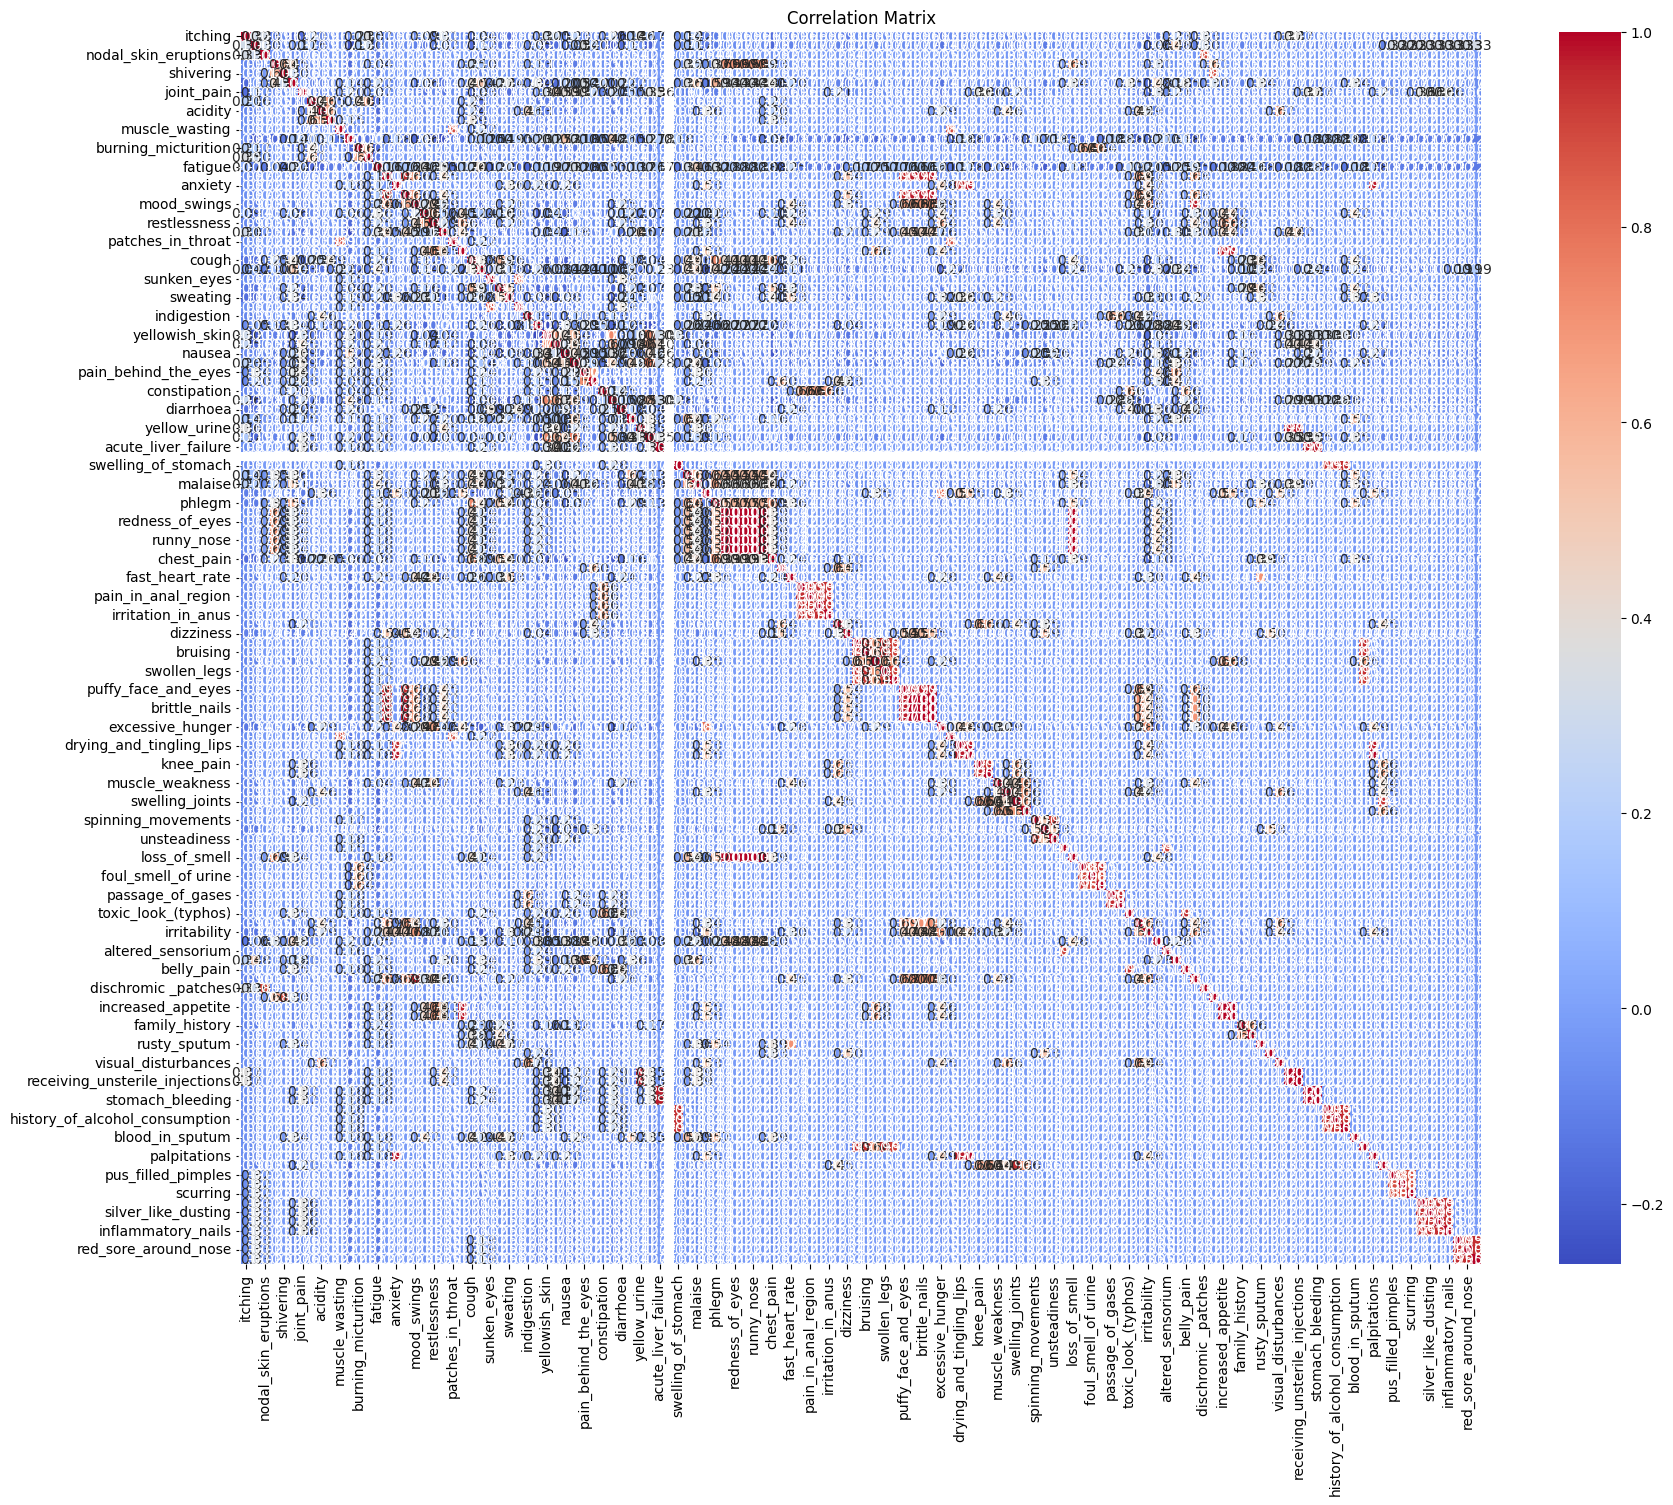

Columns to drop due to high correlation: {'patches_in_throat', 'bruising', 'bloody_stool', 'swollen_blood_vessels', 'coma', 'polyuria', 'continuous_feel_of_urine', 'stomach_bleeding', 'slurred_speech', 'drying_and_tingling_lips', 'cold_hands_and_feets', 'swollen_extremeties', 'distention_of_abdomen', 'excessive_hunger', 'belly_pain', 'swollen_legs', 'brittle_nails', 'runny_nose', 'dischromic _patches', 'fluid_overload.1', 'internal_itching', 'dehydration', 'redness_of_eyes', 'increased_appetite', 'blackheads', 'abnormal_menstruation', 'silver_like_dusting', 'receiving_unsterile_injections', 'painful_walking', 'loss_of_smell', 'puffy_face_and_eyes', 'prominent_veins_on_calf', 'irritation_in_anus', 'pain_in_anal_region', 'foul_smell_of urine', 'altered_sensorium', 'yellow_crust_ooze', 'sinus_pressure', 'palpitations', 'history_of_alcohol_consumption', 'inflammatory_nails', 'red_sore_around_nose', 'unsteadiness', 'congestion', 'receiving_blood_transfusion', 'scurring', 'extra_marital_cont

In [65]:
# Step 1: Convert all columns to numeric if possible
for col in dataset.columns:
    try:
        dataset[col] = pd.to_numeric(dataset[col])
    except:
        pass

# Step 2: Compute the Pearson Correlation Matrix
correlation_matrix = dataset.corr(numeric_only=True)

# Step 3: Plot the Correlation Matrix using a Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Step 4: Identify and remove highly correlated features
# Set a threshold for high correlation (e.g., 0.8)
threshold = 0.8

# Find pairs of features that are highly correlated
high_corr_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_pairs.add(colname)

print(f"Columns to drop due to high correlation: {high_corr_pairs}")

# Step 5: Drop the highly correlated features
reduced_dataset = dataset.drop(columns=high_corr_pairs)

print("Dimensionality Reduction Completed. New shape of the dataset:", reduced_dataset.shape)

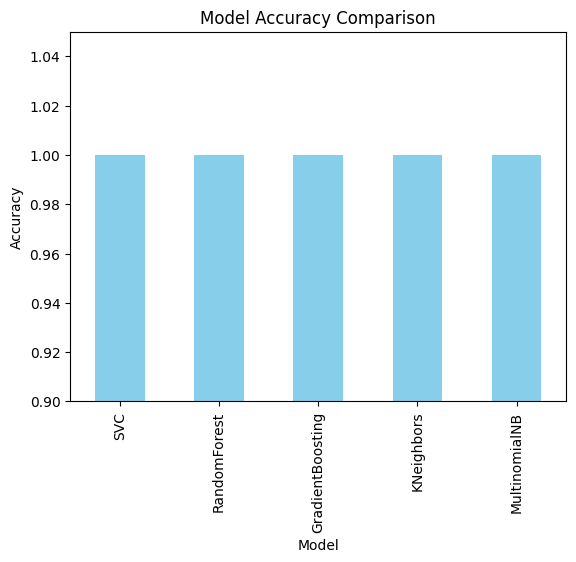

In [ ]:
# Accuracy Comparison Bar Plot
accuracies = []
for model_name, model in models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append((model_name, accuracy))

# Create a DataFrame for plotting
acc_df = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])

# Plot the accuracy comparison
acc_df.plot(kind='bar', x='Model', y='Accuracy', legend=False, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.05)  # Adjust the limit if needed
plt.show()


# Model Performance Improvement

In [ ]:

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print(f"Best parameters for SVC: {grid.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.3s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.3s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.3s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.3s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.3s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.8s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.6s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, ke

# Single prediction

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")

In [ ]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

# Test case 1:
predicted_disease = svc.predict(X_test.iloc[0].values.reshape(1, -1))
actual_disease = y_test[0]
print(f"Predicted Disease: {predicted_disease}")
print(f"Actual Disease: {actual_disease}")

# Test case 2:
predicted_disease = svc.predict(X_test.iloc[100].values.reshape(1,-1))
actual_disease = y_test[100]
print(f"Predicted Disease: {predicted_disease}")
print(f"Actual Disease: {actual_disease}")

Predicted Disease: [40]
Actual Disease: 40
Predicted Disease: [39]
Actual Disease: 39


In [ ]:
# RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
ypred_rf = rf_clf.predict(X_test)
print("RandomForest Accuracy:", accuracy_score(y_test, ypred_rf))

# Test case 1
predicted_disease_rf = rf_clf.predict(X_test.iloc[0].values.reshape(1, -1))
actual_disease_rf = y_test[0]
print(f"RandomForest - Predicted Disease: {predicted_disease_rf}, Actual Disease: {actual_disease_rf}")

# Test case 2
predicted_disease_rf = rf_clf.predict(X_test.iloc[100].values.reshape(1, -1))
actual_disease_rf = y_test[100]
print(f"RandomForest - Predicted Disease: {predicted_disease_rf}, Actual Disease: {actual_disease_rf}")

RandomForest Accuracy: 1.0
RandomForest - Predicted Disease: [40], Actual Disease: 40
RandomForest - Predicted Disease: [39], Actual Disease: 39


In [ ]:
# GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
ypred_gb = gb_clf.predict(X_test)
print("GradientBoosting Accuracy:", accuracy_score(y_test, ypred_gb))

# Test case 1
predicted_disease_gb = gb_clf.predict(X_test.iloc[0].values.reshape(1, -1))
actual_disease_gb = y_test[0]
print(f"GradientBoosting - Predicted Disease: {predicted_disease_gb}, Actual Disease: {actual_disease_gb}")

# Test case 2
predicted_disease_gb = gb_clf.predict(X_test.iloc[100].values.reshape(1, -1))
actual_disease_gb = y_test[100]
print(f"GradientBoosting - Predicted Disease: {predicted_disease_gb}, Actual Disease: {actual_disease_gb}")

GradientBoosting Accuracy: 1.0
GradientBoosting - Predicted Disease: [40], Actual Disease: 40
GradientBoosting - Predicted Disease: [39], Actual Disease: 39


In [ ]:
# KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
ypred_knn = knn_clf.predict(X_test)
print("KNeighbors Accuracy:", accuracy_score(y_test, ypred_knn))

# Test case 1
predicted_disease_knn = knn_clf.predict(X_test.iloc[0].values.reshape(1, -1))
actual_disease_knn = y_test[0]
print(f"KNeighbors - Predicted Disease: {predicted_disease_knn}, Actual Disease: {actual_disease_knn}")

# Test case 2
predicted_disease_knn = knn_clf.predict(X_test.iloc[100].values.reshape(1, -1))
actual_disease_knn = y_test[100]
print(f"KNeighbors - Predicted Disease: {predicted_disease_knn}, Actual Disease: {actual_disease_knn}")

KNeighbors Accuracy: 1.0
KNeighbors - Predicted Disease: [40], Actual Disease: 40
KNeighbors - Predicted Disease: [39], Actual Disease: 39


In [ ]:
# MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
ypred_nb = nb_clf.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, ypred_nb))

# Test case 1
predicted_disease_nb = nb_clf.predict(X_test.iloc[0].values.reshape(1, -1))
actual_disease_nb = y_test[0]
print(f"MultinomialNB - Predicted Disease: {predicted_disease_nb}, Actual Disease: {actual_disease_nb}")

# Test case 2
predicted_disease_nb = nb_clf.predict(X_test.iloc[100].values.reshape(1, -1))
actual_disease_nb = y_test[100]
print(f"MultinomialNB - Predicted Disease: {predicted_disease_nb}, Actual Disease: {actual_disease_nb}")

MultinomialNB Accuracy: 1.0
MultinomialNB - Predicted Disease: [40], Actual Disease: 40
MultinomialNB - Predicted Disease: [39], Actual Disease: 39


# Recommendation System and Prediction

# Load database and use logic for recommendations

In [ ]:
sym_des = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
medications = pd.read_csv('medications.csv')
diets = pd.read_csv("diets.csv")

In [ ]:
#========================================================#
#            custom and helping functions                #
#==================helper funtions=======================#

def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [ ]:
# Get input from user
symptoms = input("Enter your symptoms.......")

user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

KeyboardInterrupt: Interrupted by user